<a href="https://colab.research.google.com/github/nikitanecaev67-oss/SQL-analytics-1/blob/main/%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D1%81%D0%B5%D0%B3%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F_rfm%2C_%D1%81_a_b%2C_arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
uploaded_5 = files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [10]:
df = pd.read_csv(next(iter(uploaded_5)), sep=',')
display(df.head(5))

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


None

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
display(df)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,category_age
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,middle age
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,young
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,middle age
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,middle age
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,middle age
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,old
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,old
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,young
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,middle age


In [17]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
 9   category_age      1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


None

In [18]:
display(len(df['Gender'].unique()))
display(len(df['Product Category'].unique()))
display(df['Gender'].unique())
display(df['Product Category'].unique())

2

3

array(['Male', 'Female'], dtype=object)

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [24]:
import matplotlib.pyplot as plt

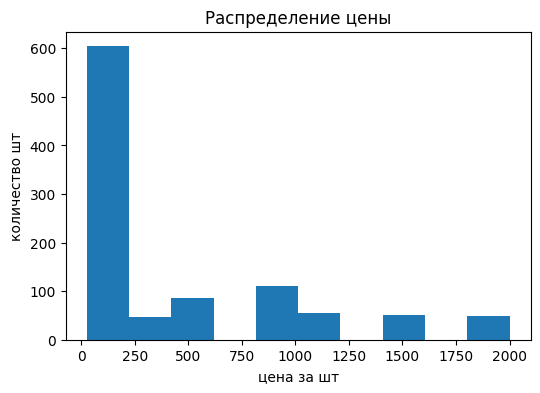

In [25]:
plt.figure(figsize=(6,4))
plt.hist(df['Total Amount'])
plt.title('Распределение цены')
plt.xlabel('цена за шт')
plt.ylabel('количество шт')
plt.show()

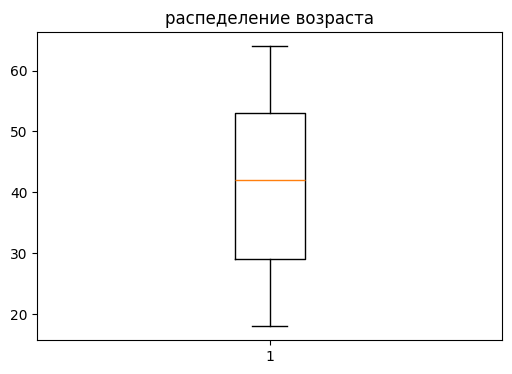

In [26]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Age'])
plt.title('распеделение возраста')
plt.show()

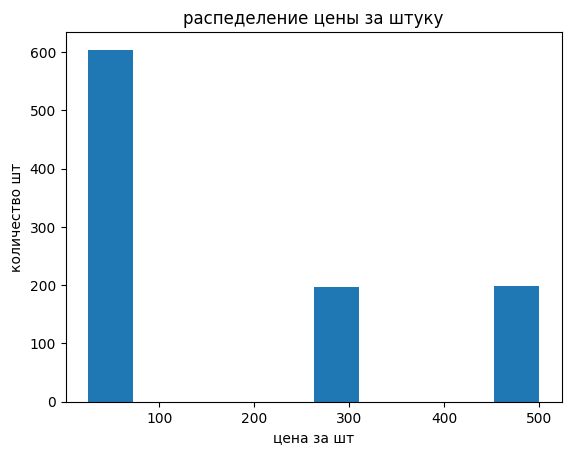

In [27]:
plt.hist(df['Price per Unit'])
plt.title('распеделение цены за штуку')
plt.xlabel('цена за шт')
plt.ylabel('количество шт')
plt.show()

In [28]:
min_age = min(df['Age'])
print(min_age)
max_age = max(df['Age'])
print(max_age)

18
64


In [20]:
print(df.isna().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
category_age        0
dtype: int64


In [21]:
#дубликатов нет
print(df.duplicated().sum())

0


In [29]:
#day_name - имя дня недели пятница/понедельник и тд, day_of_week - числовой индекс дня 0 - понедельник
df['year'] = df['Date'].dt.year
df['mouth'] = df['Date'].dt.month
display(df)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,category_age,year,mouth
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,middle age,2023,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,young,2023,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,middle age,2023,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,middle age,2023,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,middle age,2023,5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,old,2023,5
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,old,2023,11
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,young,2023,10
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,middle age,2023,12


In [30]:
df['day'] = df['Date'].dt.day_of_week
display(df)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,category_age,year,mouth,day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,middle age,2023,11,4
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,young,2023,2,0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,middle age,2023,1,4
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,middle age,2023,5,6
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,middle age,2023,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,old,2023,5,1
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,old,2023,11,4
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,young,2023,10,6
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,middle age,2023,12,1


<Axes: xlabel='mouth'>

Text(0, 0.5, 'сумма выручки')

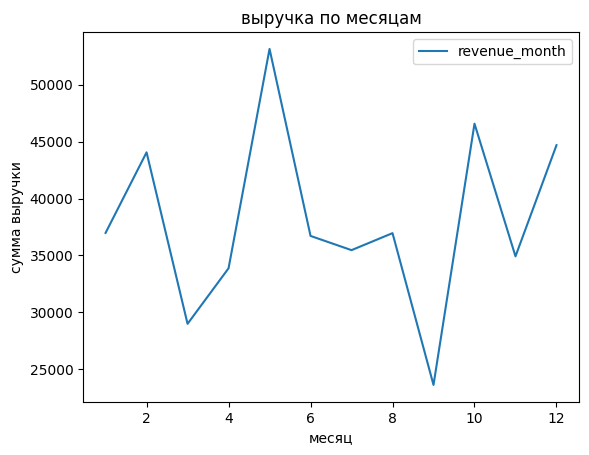

In [31]:
# df.groupby(df['mouth'] - группируем именно этот столбец [Total Amount] - по какому столбцу группируем)
grouped_month = df.groupby('mouth').agg(revenue_month = ('Total Amount', 'sum'))
display(grouped_month.plot())
plt.title('выручка по месяцам')
plt.xlabel('месяц')
plt.ylabel('сумма выручки')


<Axes: xlabel='day'>

Text(0, 0.5, 'сумма выручки')

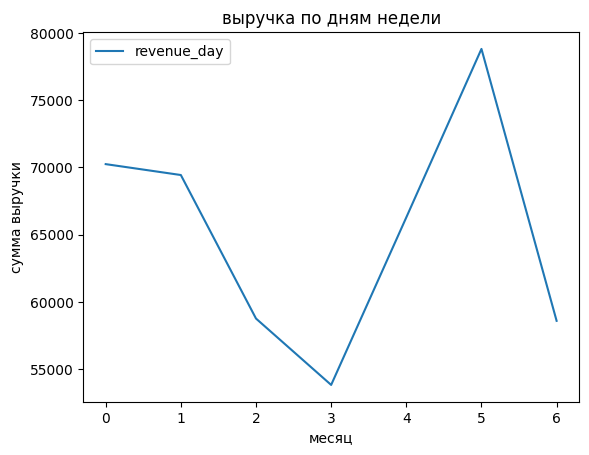

In [32]:
# 0 - понедельник и тогда дни по умолчанию ставятся в порядке с 0 до 6.
grouped_day= df.groupby('day').agg(revenue_day = ('Total Amount', 'sum'))
display(grouped_day.plot())
plt.title('выручка по дням недели')
plt.xlabel('месяц')
plt.ylabel('сумма выручки')

In [33]:
def age_category(Age):
  if Age < 30:
   return 'young'
  elif 30 <= Age <= 50:
   return 'middle age'
  elif Age > 50:
   return 'old'
# теперь присоединяю функцию прописнную в def к изначальному столбцу возраста и называю новый столбец df['category_age']
#.apply('category_age') - ссылаюсь на категорию возраста, к столбцу age_category примени функцию apply
df['category_age'] = df['Age'].apply(age_category)
display(df)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,category_age,year,mouth,day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,middle age,2023,11,4
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,young,2023,2,0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,middle age,2023,1,4
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,middle age,2023,5,6
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,middle age,2023,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,old,2023,5,1
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,old,2023,11,4
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,young,2023,10,6
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,middle age,2023,12,1


In [34]:
from ast import In

def season(month):
  if month in [12,1,2]:
   return 'winter'
  elif month in [3,4,5]:
    return 'spring'
  elif month in [6,7,8]:
    return 'summer'
  elif month in [9,10,11]:
    return 'autumn'
df['season'] = df['mouth'].apply(season)
display(df)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,category_age,year,mouth,day,season
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,middle age,2023,11,4,autumn
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,young,2023,2,0,winter
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,middle age,2023,1,4,winter
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,middle age,2023,5,6,spring
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,middle age,2023,5,5,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,old,2023,5,1,spring
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,old,2023,11,4,autumn
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,young,2023,10,6,autumn
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,middle age,2023,12,1,winter


In [35]:
#дальше буду делать сводную таблицу по по возрастам клиентов и полу для сравнения групп
pivot_1 = pd.pivot_table(df,index = 'category_age',
                         values = 'Total Amount',
                         columns = 'Gender',
                         aggfunc = 'sum')
display(pivot_1)
#из сводной таблицы видно что группы приносят схожую выручку, хотя люди среднего возраста покупают больше.

Gender,Female,Male
category_age,,
middle age,101850,97685
old,67465,65845
young,63525,59630


In [44]:
pivot_2 = pd.pivot_table(df, index = 'season',
                         values = 'Total Amount',
                         columns = 'Gender',
                         aggfunc = 'sum',
                         margins = True,
                         margins_name = 'Всего')


display(pivot_2)
#видно, что весной и зимой и женщины и мужчины покупали больше.

Gender,Female,Male,Всего
season,,,
autumn,58025,47095,105120
spring,54550,61460,116010
summer,55840,53300,109140
winter,64425,61305,125730
Всего,232840,223160,456000


In [37]:
pivot_3 = pd.pivot_table(df, index = 'mouth',
                         values = 'Total Amount',
                         columns = 'Product Category',
                         aggfunc = 'sum',
                         margins = True,
                         margins_name = 'Всего')


display(pivot_3)
# декабрь и февраль, май, октябрь принесли выручку выше среднего

Product Category,Beauty,Clothing,Electronics,Всего
mouth,,,,
1,13930,13125,9925,36980
2,14035,14560,15465,44060
3,10545,15065,3380,28990
4,11905,13940,8025,33870
5,12450,17455,23245,53150
6,10995,10170,15550,36715
7,16090,8250,11125,35465
8,9790,12455,14715,36960
9,6320,9975,7325,23620


In [38]:
pivot_4 = pd.pivot_table(df, index = ['category_age','Gender'],
                         values = 'Total Amount',
                         columns = 'Product Category',
                         aggfunc = 'sum',
                         margins = True,
                         margins_name = 'Всего')


display(pivot_4)

Product Category     Beauty  Clothing  Electronics   Всего
category_age Gender                                       
middle age   Female   36770     32270        32810  101850
             Male     33460     31040        33185   97685
old          Female   18410     24785        24270   67465
             Male     13475     21335        31035   65845
young        Female   19650     24220        19655   63525
             Male     21750     21930        15950   59630
Всего                143515    155580       156905  456000

In [39]:
import scipy.stats as stats
import statsmodels.stats.api as sms
import numpy as np
from scipy.stats import shapiro

In [229]:
display(df)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,mouth,day,category_age,season
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,4,middle age,autumn
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,0,young,winter
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,4,middle age,winter
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,6,middle age,spring
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,5,middle age,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,2023,5,1,old,spring
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,2023,11,4,old,autumn
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,2023,10,6,young,autumn
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,2023,12,1,middle age,winter


In [42]:
# H0 - средний чек одинаков во всех сезонах, H1 - хотя бы в одном сезоне средний чек различается
check_winter = df[df['season'] == 'winter']['Total Amount']
check_spring = df[df['season'] == 'spring']['Total Amount']
check_summer = df[df['season'] == 'summer']['Total Amount']
check_autumn = df[df['season'] == 'autumn']['Total Amount']
# проверим выборки на нормальность, h0 - нормально(отвергаем) h1 - не нормально(принимаем)

print("check_winter:", shapiro(check_winter))
print("check_spring:", shapiro(check_spring))
print("check_summer:", shapiro(check_summer))
print("check_autumn:", shapiro(check_autumn))

#данные не распределены нормально, хотя и подтверждается равество дисперсий
print(levene(check_winter,check_spring,check_summer,check_autumn))

#проведем непараметрический тест Крускала-Уоллеса
print(kruskal(check_winter,check_spring,check_summer,check_autumn))

check_winter: ShapiroResult(statistic=np.float64(0.7740802832835995), pvalue=np.float64(2.017512208276268e-18))
check_spring: ShapiroResult(statistic=np.float64(0.7434973873376048), pvalue=np.float64(5.962864072016629e-20))
check_summer: ShapiroResult(statistic=np.float64(0.7573405657805942), pvalue=np.float64(1.223675651152249e-18))
check_autumn: ShapiroResult(statistic=np.float64(0.7148721803599122), pvalue=np.float64(6.067004744609215e-20))
LeveneResult(statistic=np.float64(0.6838489202662701), pvalue=np.float64(0.561998841435567))
KruskalResult(statistic=np.float64(0.2808403211811689), pvalue=np.float64(0.963590680008533))


In [41]:
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats import shapiro

- если бы данные действительно были из нормального рапсределения,то вероятность получить такую же или или менее похожую на нормальную выборку равна 2.017512208276268e-18.

- Гипотезы теста Краскала-Уоллиса:
H₀ (нулевая гипотеза): Распределения (медианы) во всех группах одинаковы pvalue=np.float64(0.963590680008533) подтверждаем что нет статистически значимых различий между медианами. Это значит, что разницы в среднем чеке в зависимости от времени года нет.
H₁ (альтернативная гипотеза): Медианы хотя бы в одной группе отличаются от других

In [43]:
#проверим есть ли разница между средними чеками в зависимости от категорий товаров
display(df['Product Category'].unique())

category_Beauty = df[df['Product Category'] == 'Beauty' ]['Total Amount']
category_Clothing = df[df['Product Category'] == 'Clothing' ]['Total Amount']
category_Electronics = df[df['Product Category'] == 'Electronics' ]['Total Amount']

# проверим выборки на нормальность, нормальность не подтвердилась, берем гипотезу H1 и идем к непараметрическим

print("category_Beauty:", shapiro(category_Beauty))
print("category_Clothing:", shapiro(category_Clothing))
print("category_Electronics:", shapiro(category_Electronics))

#применим тест краскела-уоллиса, h0 не отклоняется 97% получить такую же выборку с равными медианами

print(kruskal(category_Beauty,category_Clothing,category_Electronics))

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

category_Beauty: ShapiroResult(statistic=np.float64(0.7582388685086845), pvalue=np.float64(6.339108582500016e-21))
category_Clothing: ShapiroResult(statistic=np.float64(0.7420337981418812), pvalue=np.float64(5.328925354441864e-23))
category_Electronics: ShapiroResult(statistic=np.float64(0.7453186029227454), pvalue=np.float64(1.3860162157175031e-22))
KruskalResult(statistic=np.float64(0.055349195153125114), pvalue=np.float64(0.9727048358194267))


После проведения 2 тестов для разных выборок(в первом случае это тест по среденму чеку в зависимости от времени года, во втором случае - тест различиям в зависимоати от категории товаров) можно сказать что при выборках в 200/300 наблюдений отсутсвует различия между выорками.
Так как выручка в данном случае является ключевым показателем для анализа, то возможно она зависит от других факторов и сложно предсказывается. Так на выручку могут влиять внешние факторы, такие как конкуренция на рынке, изменение цен, маркентинг компании или ярко выраженная сезонность. Это создает дополнительные сложности при анализе и не позволяет использовать параметрические статистические критерии.

In [6]:
#rfm анализ по каждому клиенту отдельно.
import pandas as pd

# 1 рассчитать кол-во дней от анализа до последней покупки.
df['order_recency'] = pd.to_datetime('2024-01-01') - pd.to_datetime(df['Date'].dt.date)

# 2 Необходимо сгруппировать данные для каждого пользователя и данные для RFM анализа.

rfm = df.groupby('Customer ID').agg(
    recency = ('order_recency', lambda x: x.min().days),
    frequency = ('Transaction ID', 'nunique'),
    monetary_value = ('Total Amount', 'sum')
).reset_index()

# 3 определить параметр разбивки по группам по каждому признаку.

# Создание RFM сегментов
rfm['r'] = pd.qcut(rfm['recency'], q=3, labels=[3, 2, 1])
rfm['f'] = pd.cut(rfm['frequency'], [0, 2, 10, 1000], labels=[1, 2, 3])
rfm['m'] = pd.qcut(rfm['monetary_value'], q=3, labels=[1, 2, 3])

display(rfm)


# 4 определение rfm иднекса сегмента

rfm[['r','f','m']] = rfm[['r','f','m']].astype('str')
rfm['rfm_group'] = rfm['r'] + rfm['f'] + rfm['m']

rfm[['r','f','m']] = rfm[['r','f','m']].astype('int')
rfm['rfm_sum'] = rfm[['r','f','m']].sum(axis =1)

# 5 Необходимо сгруппировать данные по сегментам и посчитать их размер

rfm_group = rfm.groupby('rfm_group').agg(
    {
        'Customer ID' : 'nunique',
        'rfm_sum' : 'mean'
    }
).reset_index()

display(rfm_group.sort_values(by = 'Customer ID'))

,Customer ID,recency,frequency,monetary_value,r,f,m
0,CUST001,38,1,150,3,1,2
1,CUST002,308,1,1000,1,1,3
2,CUST003,353,1,30,1,1,1
3,CUST004,225,1,500,2,1,2
4,CUST005,240,1,100,2,1,2
...,...,...,...,...,...,...,...
995,CUST995,246,1,30,1,1,1
996,CUST996,230,1,50,2,1,1
997,CUST997,45,1,90,3,1,1
998,CUST998,64,1,100,3,1,2


,rfm_group,Customer ID,rfm_sum
2,113,94,5.0
8,313,102,7.0
5,213,103,6.0
3,211,108,4.0
1,112,116,4.0
6,311,117,5.0
7,312,118,6.0
4,212,118,5.0
0,111,124,3.0


In [7]:
import plotly.express as px
fig = px.treemap(rfm_group,
                 path= ['rfm_group'],
                 values = 'Customer ID',
                 color= 'rfm_sum',
                 color_continuous_scale= 'Sunset',
                 title = 'RFM сегментация пользователей')
fig.show()

#после анализа принято решение поменять параметр frequeny, с каждого клиента отдельно на количество товаров купленных каждым кллиентом

In [8]:
# во втором случае rfm анализа принято решение об изменение параметра frequeny, и проведение анализа на основание количества товара в чеке.
# rfm анализ, расчет количества дней с последней покупки.
#возвращает массив дат без времени из столбца объектов, в нашем случае был datetime, стал объект, то есть массив

df['order_recency'] = (pd.to_datetime('2025-11-15') - pd.to_datetime(df['Date'])).dt.days
# расчитать frequeny, Monetary, делаем через присвоение переменных для дальнейщего анализа
# вид: df.groupby('столбец_группировки').agg({'столбец': 'функция'})


# Теперь агрегируем обычным min (уже число дней)
rfm = df.groupby('Customer ID').agg(
    recency=('order_recency', 'min'),  # Просто берем минимальное значение
    frequeny=('Transaction ID', 'nunique'),
    monetary=('Total Amount', 'sum')
).reset_index()
# присвоить парамерты по сегментам клиентов от 1 до 3
#функция из библиотеки Pandas, которая используется для разделения непрерывных числовых данных
#на дискретные интервалы или "корзины" (bins).
# в cut можно явно указать границы интервалов
rfm['r'] = pd.qcut(rfm['recency'], q = 3, labels = [3, 2, 1])
rfm['f'] = pd.cut(rfm['frequeny'], [0, 2, 3, 4], labels = [1, 2, 3])
rfm['m'] = pd.qcut(rfm['monetary'], q = 3, labels=[1, 2, 3])

display(rfm)
# определение индекса сегмента
# astype это метод для явного изменения типа данных объектов Pandas (например, Series или DataFrame
rfm[['r','f','m']] = rfm[['r','f','m']].astype('str')
rfm['rfm_group'] = rfm['r'] + rfm['f'] + rfm['m']

rfm[['r','f','m']] = rfm[['r','f','m']].astype('int')
rfm['rfm_sum'] = rfm[['r','f','m']].sum(axis =1)

#группируем данные по сгментам и считаем их размер
rfm_group = rfm.groupby('rfm_group').agg({
    'Customer ID' : 'nunique',
        'rfm_sum' : 'mean'
} ).reset_index()

display(rfm_group.sort_values(by = 'Customer ID'))


,Customer ID,recency,frequeny,monetary,r,f,m
0,CUST001,722,1,150,3,1,2
1,CUST002,992,1,1000,1,1,3
2,CUST003,1037,1,30,1,1,1
3,CUST004,909,1,500,2,1,2
4,CUST005,924,1,100,2,1,2
...,...,...,...,...,...,...,...
995,CUST995,930,1,30,1,1,1
996,CUST996,914,1,50,2,1,1
997,CUST997,729,1,90,3,1,1
998,CUST998,748,1,100,3,1,2


,rfm_group,Customer ID,rfm_sum
2,113,94,5.0
8,313,102,7.0
5,213,103,6.0
3,211,108,4.0
1,112,116,4.0
6,311,117,5.0
7,312,118,6.0
4,212,118,5.0
0,111,124,3.0


In [9]:
#рисую график сегментации.
import plotly.express as px

fig = px.treemap(rfm_group,
                 path = ['rfm_group'],
                 values = 'Customer ID',
                 color = 'rfm_sum',
                 color_continuous_scale= 'Sunset',
                 title = 'RFM сегментация пользователей')

fig.show()


In [37]:
display(df['Quantity'].unique())

array([3, 2, 1, 4])

клиентов сегмента 111 много, для привлечения их к покупкам можно предложить особые скидки.
также большая доля клиентов сегмента 311, это те кто недавно совершил покупку, а значит этих клиентов можно вовлечь в наш бренд.
клиентов сегмента 333, которые покупали в больших количестах и недавно немного, им можно предложить высокие уровни в программе лояльности или эксклюзивный доступ.

In [164]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


None

In [165]:
print(df.head(5))

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [166]:
df = df.sort_values(by = 'Date')

In [167]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [168]:
df= df[['Date','Total Amount']]
print(df)

          Date  Total Amount
521 2023-01-01          1500
179 2023-01-01           900
558 2023-01-01          1200
302 2023-01-02            90
978 2023-01-02            25
..         ...           ...
232 2023-12-29           600
804 2023-12-29          1500
856 2023-12-31            50
210 2024-01-01          1500
649 2024-01-01            30

[1000 rows x 2 columns]


In [169]:
df.set_index('Date', inplace = True)

In [170]:
print(df)

            Total Amount
Date                    
2023-01-01          1500
2023-01-01           900
2023-01-01          1200
2023-01-02            90
2023-01-02            25
...                  ...
2023-12-29           600
2023-12-29          1500
2023-12-31            50
2024-01-01          1500
2024-01-01            30

[1000 rows x 1 columns]


In [171]:
df.sort_index(inplace= True)

In [187]:
df2 = df['Total Amount'].resample('1W').sum()
print(df2)

Date
2023-01-01     3600
2023-01-08     6100
2023-01-15     4850
2023-01-22     8215
2023-01-29     9845
2023-02-05    13070
2023-02-12     8365
2023-02-19    13815
2023-02-26     7645
2023-03-05     7155
2023-03-12     6090
2023-03-19     4075
2023-03-26    13085
2023-04-02     9590
2023-04-09     9605
2023-04-16     3060
2023-04-23     9925
2023-04-30     4280
2023-05-07     5735
2023-05-14     9050
2023-05-21    17515
2023-05-28    17210
2023-06-04     6005
2023-06-11    11770
2023-06-18     4250
2023-06-25    11820
2023-07-02     8260
2023-07-09     4315
2023-07-16     8645
2023-07-23     6160
2023-07-30    13095
2023-08-06    10610
2023-08-13     6585
2023-08-20     6980
2023-08-27     8945
2023-09-03     8385
2023-09-10     5240
2023-09-17     6375
2023-09-24     1895
2023-10-01     9865
2023-10-08    12980
2023-10-15     7825
2023-10-22     8970
2023-10-29    12140
2023-11-05     8730
2023-11-12     7910
2023-11-19     9475
2023-11-26     7760
2023-12-03     6650
2023-12-10    1

In [188]:
# для вывода статистических характеристик ряда
print(df2.describe())

count       54.000000
mean      8444.444444
std       3579.696633
min       1530.000000
25%       6115.000000
50%       8237.500000
75%       9860.000000
max      17515.000000
Name: Total Amount, dtype: float64


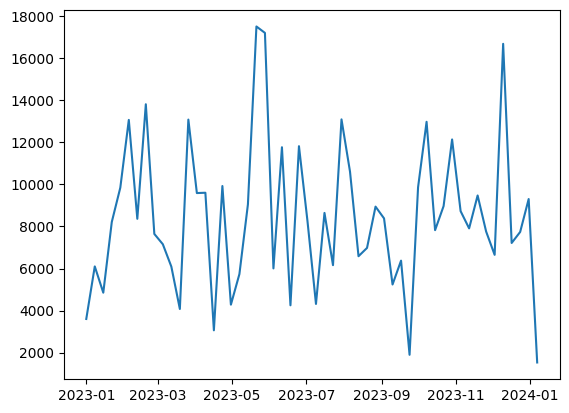

In [189]:
import matplotlib.pyplot as plt

#plt.plot(df2.index, df2.values) - так как мы поменяли на 1 колонку и индекс, то первое - индекс, а второй просто значения.
#теперь у нас тип объекта поменялся на series с колонки таблицы. datafame - таблица, мы заменили на series.
plt.plot(df2.index, df2.values)
plt.show()
#не видно тренда сезонности

In [190]:
from statsmodels.tsa.stattools import adfuller
#обращаемся к индексу p значения, он стоит вторым так что пишем единицу
#arima - с дифференцированием ряда, буква i
p_value = adfuller(df2.values)[1]
print(p_value)
#так как п значение < 0,05 то мы отвергаем гипотезу h0 и говорим что ряд стационарен

2.6161087337490174e-09


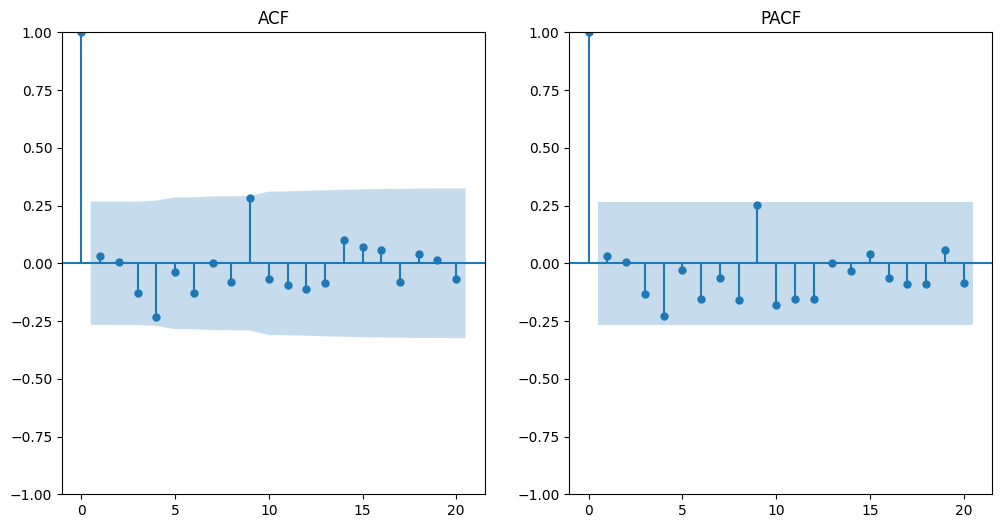

In [191]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# 1 строка, 2 колонки, позиция 1(первая позиция)
plt.figure(figsize = (12,6))
plt.subplot(121)
plot_acf(df2, ax=plt.gca(),lags=20)
plt.title('ACF')

plt.subplot(122)
plot_pacf(df2, ax=plt.gca(),lags=20)
plt.title('PACF')

plt.show()

#на обеих графиках обрыв после первого лага

In [192]:
#trainsize - размер тестовой группы

#упоорядоченные данные мы засунули 80% данных в тестовую, а другую в контрольную
#Сначала данные разделяются на обучающую и тестовую выборки: 80% данных используются для обучения модели,
#а оставшиеся 20% — для тестирования.
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
lenght = int(len(df2)*0.8)
train = df2[:lenght]
test = df2[lenght:]

In [193]:
#постороть модель регрессии просто, ar (), arima(100)или arima(200)
model = ARIMA(train, order =(1,0,1))
# тут и происходит обучение модели на данных, находя оптимальные значения
model_fit = model.fit()
#aic - служит для сопоставления модели с разными параметрами, где он меньше там и лучше
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           Total Amount   No. Observations:                   43
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -411.140
Date:                Fri, 19 Dec 2025   AIC                            830.280
Time:                        12:05:03   BIC                            837.325
Sample:                    01-01-2023   HQIC                           832.878
                         - 10-22-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8384.3180    620.555     13.511      0.000    7168.053    9600.583
ar.L1         -0.8096      0.088     -9.153      0.000      -0.983      -0.636
ma.L1          1.0000      0.224      4.454      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [194]:
import numpy as np
#количестенная оценка качества прогнозов arma тестирования(forecast - прогнозные)
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index
#на train данные обучились, дальше вытаскиваем прогнозные значения

#MSE (Mean Squared Error) — Среднеквадратичная ошибка
mse = mean_squared_error(test,forecast)
#RMSE (Root Mean Squared Error) — Корень из среднеквадратичной ошибки(Средняя ошибка в тех же единицах, что и исходные данные)
rmse = np.sqrt(mse)
#MAE (Mean Absolute Error) — Средняя абсолютная ошибка
mae = mean_absolute_error(test,forecast)
#MAPE (Mean Absolute Percentage Error) — Средняя абсолютная процентная ошибка (На сколько процентов в среднем ошибается модель)
mape = np.mean(np.abs((test - forecast) / test * 100))

#если rmse (станд отклон) состовляет больше 20% от среднего знчения, то модель неточная (56472.702005356005)
# сао - сред абсол отклон - mae
# хороший mape < 10% показывает на сколько в среднем ошибается модель

print(mse)
print(rmse)
print(mae)
print(mape)

12722268.77235158
3566.828951933577
2333.847909341961
55.75763886485105


55% - в среднем модель ошибается в 55 случаях из 100, модель не точная. Необходимо исользовать другие модели, вместо arima для прогнозирования выручки.

In [ ]:
print()

      lb_stat  lb_pvalue
1    0.000009   0.997636
2    0.443447   0.801137
3    4.244721   0.236222
4    5.134914   0.273732
5    5.156163   0.397121
6    7.357187   0.289074
7    7.505583   0.378199
8    7.881591   0.445121
9   12.500310   0.186550
10  12.983957   0.224570


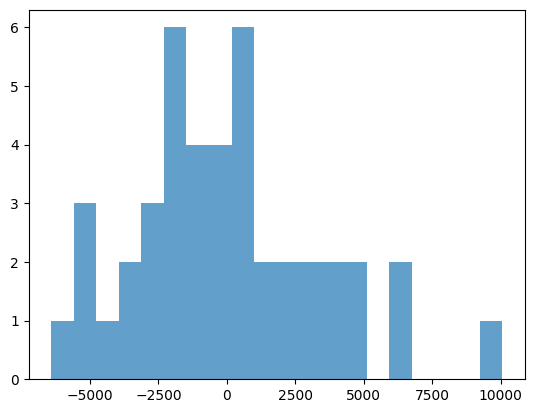

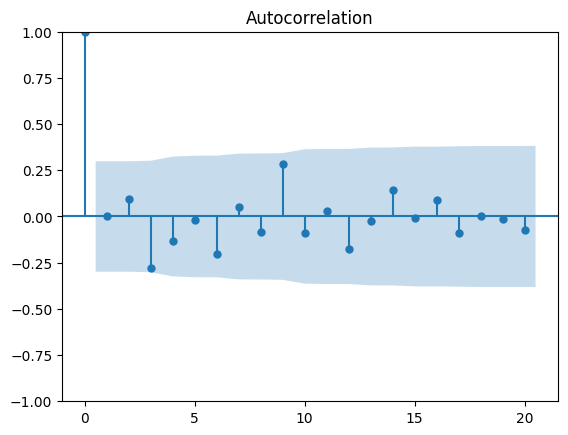

In [195]:
# Проверка остатков на нормальность и автокорреляцию
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = model_fit.resid
lb_test = acorr_ljungbox(residuals, lags = 10)
print(lb_test)
#визуально остатки рапседелены нормально (k=1+3.322*log10N)
plt.hist(residuals, bins = 20, alpha = 0.7)

#нет значимой автокореляции остатков
plot_acf(residuals, lags = 20)
plt.show()

In [201]:
#Построение итогового графика.
final_model = ARIMA(df2, order=(1,0,1))
final_model_fit = final_model.fit()

future_step = 10
future_forecast = final_model_fit.forecast(steps = future_step)

last_date = df2.index[-1]
future_dates = pd.date_range(start = last_date + pd.Timedelta(weeks = 1), periods = future_step, freq='1W')

for date,value in zip(future_dates, future_forecast):
  print(f"{date.strftime('%Y-%m-%d')}: {value:.2f}")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



2024-01-14: 8201.23
2024-01-21: 8431.11
2024-01-28: 8443.71
2024-02-04: 8444.40
2024-02-11: 8444.44
2024-02-18: 8444.44
2024-02-25: 8444.44
2024-03-03: 8444.44
2024-03-10: 8444.44
2024-03-17: 8444.44


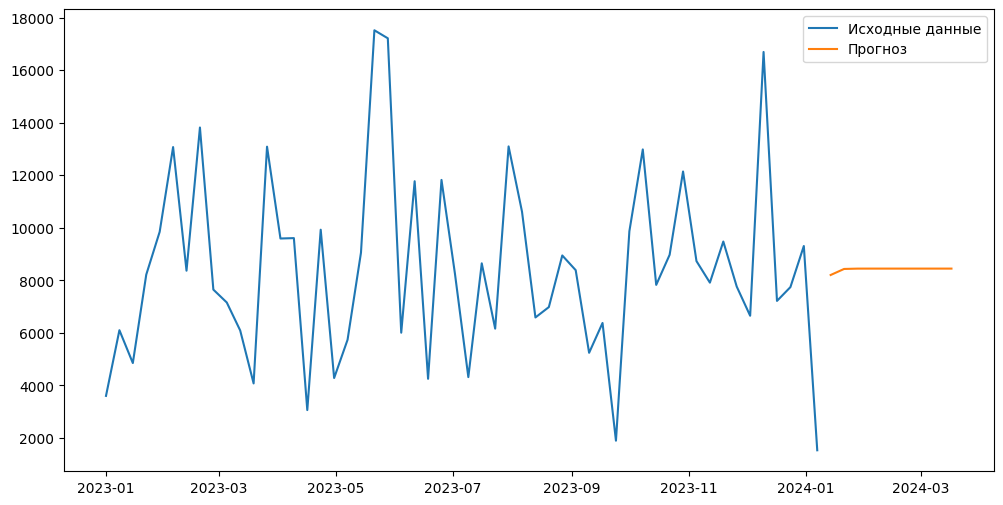

In [202]:
plt.figure(figsize=(12,6))
plt.plot(df2.index, df2.values, label = 'Исходные данные')
plt.plot(future_dates, future_forecast, label = 'Прогноз')
plt.legend()
plt.show()

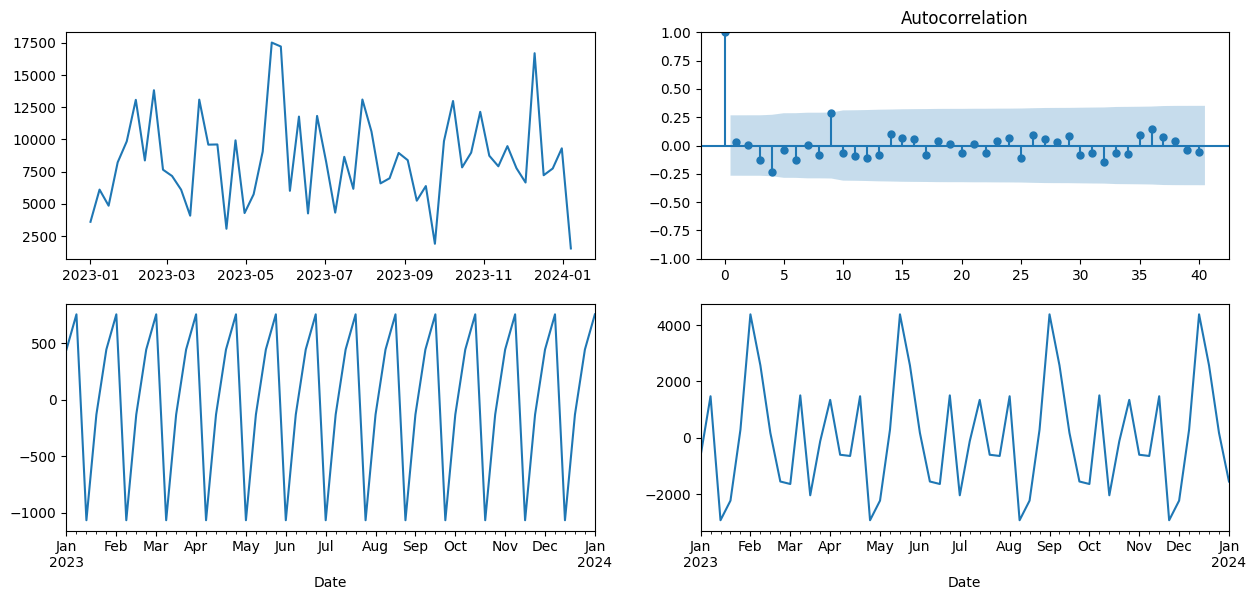

In [203]:
# проверим сезонность.

from statsmodels.tsa.seasonal import seasonal_decompose
plt. figure(figsize=(15,10))
plt. subplot (3,2,1)
plt. plot(df2.index, df2.values)
plt. subplot (3, 2,2)
plot_acf(df2, lags=40, ax=plt.gca())
seasonal_periods = [4, 15, 45]
for i, period in enumerate(seasonal_periods, start=3):
  if len (df2)>= 2*period:
    plt. subplot (3,2,i)
    decomposition = seasonal_decompose(df2, model='additive', period=period)
    decomposition.seasonal.plot(ax=plt.gca())
plt. show()
#видим ярко выраженную сезонность, можем использовать sarima